In [1]:
pip install transformers


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade tensorflow keras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [89]:
import pandas as pd
import random
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from keras.models import save_model
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import keras.backend as K

In [90]:
import pandas as pd
import re
import string
from tqdm import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [91]:
validation_test = pd.read_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\labelNew3column.csv')
df = pd.read_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\Hasil3label_trainingmodel.csv')


In [92]:
import pandas as pd

# Baca data dari file CSV (COBA TERUS)
validation_test = pd.read_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\labelNew3column.csv')
df = pd.read_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\Hasil3label_trainingmodel.csv')

# Lakukan one-hot encoding pada kolom 'polarity'
one_hot_encoded = pd.get_dummies(validation_test['polarity'], prefix='one_hot')

# Gabungkan hasil one-hot encoding dengan DataFrame asli
validation_test = pd.concat([validation_test, one_hot_encoded], axis=1)

# Tampilkan hasil
print(validation_test)


                                              STEMMING  \
0    alih cirebon kabupaten timur laut jawa barat m...   
1    hasil cak achmadfauzi wy pimpin sumenep salah ...   
2    jawa timur angka nikah anak tingkat pandemi im...   
3    1 762 pasang suami istri bojonegoro jawa timur...   
4    tangan khofifah indar parawansa angka miskin j...   
..                                                 ...   
196  bps catat tingkat miskin indonesia capai 9 57 ...   
197  live program tangan miskin padu jumat 20 janua...   
198  informasi bps statistics kait angka miskin 3 p...   
199  gus raharjo pangestiwerda ridwankamil moga ang...   
200  nih gampang baca yang banding jawa timur jawa ...   

                                       tokenized_sents  polarity  one_hot_-1  \
0    ['alih', 'cirebon', 'kabupaten', 'timur', 'lau...         1       False   
1    ['hasil', 'cak', 'achmadfauzi', 'wy', 'pimpin'...        -1        True   
2    ['jawa', 'timur', 'angka', 'nikah', 'anak', 't...        -

In [94]:
import pandas as pd

# Baca data dari file CSV
validation_test = pd.read_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\labelNew3column.csv')
df = pd.read_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\Hasil3label_trainingmodel.csv')

# Definisikan mapping dari label ke one-hot encoding
label_to_onehot = {
    -1: [1, 0, 0],  # negative
    0: [0, 1, 0],   # neutral
    1: [0, 0, 1]    # positive
}

# Ubah kolom 'polarity' menjadi one-hot encoding
validation_test['one_hot_encoded'] = validation_test['polarity'].apply(lambda x: label_to_onehot[x])

# Pisahkan one-hot encoding menjadi kolom-kolom terpisah
validation_test[['one_hot_negative', 'one_hot_neutral', 'one_hot_positive']] = pd.DataFrame(validation_test['one_hot_encoded'].tolist(), index=validation_test.index)

# Tampilkan hasil
print(validation_test)


                                              STEMMING  \
0    alih cirebon kabupaten timur laut jawa barat m...   
1    hasil cak achmadfauzi wy pimpin sumenep salah ...   
2    jawa timur angka nikah anak tingkat pandemi im...   
3    1 762 pasang suami istri bojonegoro jawa timur...   
4    tangan khofifah indar parawansa angka miskin j...   
..                                                 ...   
196  bps catat tingkat miskin indonesia capai 9 57 ...   
197  live program tangan miskin padu jumat 20 janua...   
198  informasi bps statistics kait angka miskin 3 p...   
199  gus raharjo pangestiwerda ridwankamil moga ang...   
200  nih gampang baca yang banding jawa timur jawa ...   

                                       tokenized_sents  polarity  \
0    ['alih', 'cirebon', 'kabupaten', 'timur', 'lau...         1   
1    ['hasil', 'cak', 'achmadfauzi', 'wy', 'pimpin'...        -1   
2    ['jawa', 'timur', 'angka', 'nikah', 'anak', 't...        -1   
3    ['1', '762', 'pasang', 'su

In [95]:
import pandas as pd

# Baca data dari file CSV
validation_test = pd.read_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\labelNew3column.csv')
df = pd.read_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\Hasil3label_trainingmodel.csv')

# Lakukan one-hot encoding pada kolom 'polarity'
onehot_encoded = pd.get_dummies(validation_test['polarity'], prefix='polarity')

# Gabungkan one-hot encoded labels ke dalam DataFrame
validation_test = pd.concat([validation_test, onehot_encoded], axis=1)

# Tampilkan hasil
print(validation_test)


                                              STEMMING  \
0    alih cirebon kabupaten timur laut jawa barat m...   
1    hasil cak achmadfauzi wy pimpin sumenep salah ...   
2    jawa timur angka nikah anak tingkat pandemi im...   
3    1 762 pasang suami istri bojonegoro jawa timur...   
4    tangan khofifah indar parawansa angka miskin j...   
..                                                 ...   
196  bps catat tingkat miskin indonesia capai 9 57 ...   
197  live program tangan miskin padu jumat 20 janua...   
198  informasi bps statistics kait angka miskin 3 p...   
199  gus raharjo pangestiwerda ridwankamil moga ang...   
200  nih gampang baca yang banding jawa timur jawa ...   

                                       tokenized_sents  polarity  polarity_-1  \
0    ['alih', 'cirebon', 'kabupaten', 'timur', 'lau...         1        False   
1    ['hasil', 'cak', 'achmadfauzi', 'wy', 'pimpin'...        -1         True   
2    ['jawa', 'timur', 'angka', 'nikah', 'anak', 't...      

In [96]:
import pandas as pd

# Baca data dari file CSV
validation_test = pd.read_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\labelNew3column.csv')
df_test = pd.read_csv(r'D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\Hasil3label_trainingmodel.csv')

# Lakukan one-hot encoding pada kolom 'polarity'
onehot_encoded = pd.get_dummies(validation_test['polarity'], prefix='polarity')

# Gabungkan one-hot encoded labels ke dalam DataFrame
validation_test = pd.concat([validation_test, onehot_encoded], axis=1)

# Tampilkan hasil
print(validation_test)


                                              STEMMING  \
0    alih cirebon kabupaten timur laut jawa barat m...   
1    hasil cak achmadfauzi wy pimpin sumenep salah ...   
2    jawa timur angka nikah anak tingkat pandemi im...   
3    1 762 pasang suami istri bojonegoro jawa timur...   
4    tangan khofifah indar parawansa angka miskin j...   
..                                                 ...   
196  bps catat tingkat miskin indonesia capai 9 57 ...   
197  live program tangan miskin padu jumat 20 janua...   
198  informasi bps statistics kait angka miskin 3 p...   
199  gus raharjo pangestiwerda ridwankamil moga ang...   
200  nih gampang baca yang banding jawa timur jawa ...   

                                       tokenized_sents  polarity  polarity_-1  \
0    ['alih', 'cirebon', 'kabupaten', 'timur', 'lau...         1        False   
1    ['hasil', 'cak', 'achmadfauzi', 'wy', 'pimpin'...        -1         True   
2    ['jawa', 'timur', 'angka', 'nikah', 'anak', 't...      

In [97]:
validation_test

,STEMMING,tokenized_sents,polarity,polarity_-1,polarity_0,polarity_1
0,alih cirebon kabupaten timur laut jawa barat m...,"['alih', 'cirebon', 'kabupaten', 'timur', 'lau...",1,False,False,True
1,hasil cak achmadfauzi wy pimpin sumenep salah ...,"['hasil', 'cak', 'achmadfauzi', 'wy', 'pimpin'...",-1,True,False,False
2,jawa timur angka nikah anak tingkat pandemi im...,"['jawa', 'timur', 'angka', 'nikah', 'anak', 't...",-1,True,False,False
3,1 762 pasang suami istri bojonegoro jawa timur...,"['1', '762', 'pasang', 'suami', 'istri', 'bojo...",-1,True,False,False
4,tangan khofifah indar parawansa angka miskin j...,"['tangan', 'khofifah', 'indar', 'parawansa', '...",-1,True,False,False
...,...,...,...,...,...,...
196,bps catat tingkat miskin indonesia capai 9 57 ...,"['bps', 'catat', 'tingkat', 'miskin', 'indones...",1,False,False,True
197,live program tangan miskin padu jumat 20 janua...,"['live', 'program', 'tangan', 'miskin', 'padu'...",-1,True,False,False
198,informasi bps statistics kait angka miskin 3 p...,"['informasi', 'bps', 'statistics', 'kait', 'an...",-1,True,False,False
199,gus raharjo pangestiwerda ridwankamil moga ang...,"['gus', 'raharjo', 'pangestiwerda', 'ridwankam...",-1,True,False,False


In [98]:
df['STEMMING']


0                              biskichoff kdrt versi lite
1       kenap masalah rumah tangga tidak selingkuh ya ...
2       tanyakanrl prosesi orang tahu acara nikah miri...
3       ndrewstjan ambil poin saja si tahan rumah tang...
4       hellosnzh karena mental anak tidak hanya rusak...
                              ...                        
1487    idextratime tidak jaga asa 4nton ya si eti bah...
1488    ratna gummybear shadyamala kegblgnunfaedh maks...
1489    sekolah kalau ambil peran cegah cerai lho ajar...
1490    dengar berita selingkuh cerai n nsebuah utas h...
1491    angka nikah indonesia turun marak cerai artis ...
Name: STEMMING, Length: 1492, dtype: object

In [99]:
df['polarity'].value_counts()

polarity
-1    1145
 1     189
 0     158
Name: count, dtype: int64

In [100]:
X = np.array(df['STEMMING'].tolist())
y = np.array(df['polarity'].tolist())

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [101]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1193,)
(1193,)
(299,)
(299,)


In [58]:
# Mengubah kelas menjadi 3 kelas
className = {
    -1: 0,
     0 : 1,
     1 : 2
}




In [59]:
# Ubah label sesuai dengan representasi yang diinginkan
y_train = np.array([to_categorical(className[label], num_classes=3) for label in y_train])
y_test = np.array([to_categorical(className[label], num_classes=3) for label in y_test])


In [60]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

### vectorizer

In [61]:
# Setup text vectorization variables
max_vocab_length = 350 # max number of words to have in our vocabulary
max_length = 33
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

Beautiful!

To map our `TextVectorization` instance `text_vectorizer` to our data, we can call the `adapt()` method on it whilst passing it our training text.

In [62]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(X)

contoh

In [63]:
# Create sample sentence and tokenize it
sample_sentence = "fendi kae affan gas ayo"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 33), dtype=int64, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)>

In [64]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 350
Top 5 most common words: ['', '[UNK]', 'keras', 'n', 'seksual']
Bottom 5 least common words: ['n3', 'lingkung', 'layan', 'kriminal', 'jatim']


### Creating an Embedding using an Embedding Layer

> Indented block



We've got a way to map our text to numbers. How about we go a step further and turn those numbers into an embedding?

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. `1` = I, `2` = love, `3` = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

We can see what an embedding of a word looks like by using the [`tf.keras.layers.Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) layer. 

The main parameters we're concerned about here are:
* `input_dim` - The size of the vocabulary (e.g. `len(text_vectorizer.get_vocabulary()`).
* `output_dim` - The size of the output embedding vector, for example, a value of `100` outputs a  feature vector of size 100 for each word.
* `embeddings_initializer` - How to initialize the embeddings matrix, default is `"uniform"` which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* `input_length` - Length of sequences being passed to embedding layer.

Knowing these, let's make an embedding layer.

In [65]:
embedding = layers.Embedding(
    input_dim=max_vocab_length, # set input shape
    output_dim=128, # set size of embedding vector
    embeddings_initializer="uniform", # default, intialize randomly
    input_length=max_length
) # how long is each input

embedding

contoh

In [66]:
# Get a random sentence from training set
random_sentence = random.choice(x_train)
print(f"Original text:\n{random_sentence}\n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
tekan keras perempuan anak khofifah sedia hotline sapa 129 takut lapor nhttps t co 1tnnqdqudu n nfollow google berita https t co nfecdo46tg n beritaviral berita news bangsaonline https t co 2gdfcgt0ac

Embedded version:


<tf.Tensor: shape=(1, 33, 128), dtype=float32, numpy=
array([[[-0.03997248,  0.02360257,  0.00129001, ..., -0.03795392,
         -0.04922122,  0.03377764],
        [-0.02441963, -0.01924564, -0.03049666, ...,  0.0084997 ,
          0.03093472,  0.02188599],
        [-0.01490261,  0.01670546,  0.02940928, ...,  0.03436105,
         -0.02622171,  0.02494545],
        ...,
        [-0.02718331,  0.04546649, -0.04028942, ..., -0.02194541,
         -0.0480021 ,  0.03522803],
        [-0.03997248,  0.02360257,  0.00129001, ..., -0.03795392,
         -0.04922122,  0.03377764],
        [-0.04401385,  0.03977026,  0.024415  , ..., -0.00354096,
         -0.01029912,  0.02783266]]], dtype=float32)>

# Model

In [67]:
max_fatures = 2000

tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(x_train)

X = tokenizer.texts_to_sequences(x_train)
X = pad_sequences(X)

In [68]:
# MODEL CNN-LSTM
inputs = layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)(x) # return vector for whole sequence

out = tf.keras.layers.Dense(64, activation='relu')(x)
out = tf.keras.layers.Dense(16, activation='relu')(x)

out = tf.keras.layers.Dropout(0.5)(out)

# Output layer dengan 3 unit (sesuai dengan jumlah kelas) dan aktivasi softmax
outputs = layers.Dense(3, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs, name="model_LSTM")

In [69]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
    tf.keras.metrics.TruePositives(name='TruePositive'),
    tf.keras.metrics.FalsePositives(name='FalsePositive'),
    tf.keras.metrics.TrueNegatives(name='TrueNegative'),
    tf.keras.metrics.FalseNegatives(name='FalseNegative'), 
    tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    get_f1
]


# Compile model
model.compile(
    loss="categorical_crossentropy",  # Menggunakan categorical_crossentropy karena label dalam bentuk one-hot encoding
    optimizer='adam',
    metrics=METRICS,
)




In [70]:
model.summary()

Model: "model_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 33)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 33, 128)           44800     
                                                                 
 conv1d_1 (Conv1D)           (None, 33, 32)            8224      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 16, 32)            0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 128)               8

In [71]:
from tensorflow.keras.utils import plot_model



In [72]:
# Check for GPU
!nvidia-smi -L

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [73]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    restore_best_weights=True,
    patience=3, 
    min_delta=0.01, 
    monitor='val_loss'
)

In [74]:
epoch = 10
# Fit model
model_history = model.fit(
    x_train,
    y_train,
    epochs=epoch,
    batch_size=60,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/10
20/20 [==============================] - 5s 71ms/step - loss: 0.8244 - TruePositive: 566.0000 - FalsePositive: 164.0000 - TrueNegative: 2222.0000 - FalseNegative: 627.0000 - accuracy: 0.7385 - precision: 0.7753 - recall: 0.4744 - auc: 0.8357 - get_f1: 0.4823 - val_loss: 0.7507 - val_TruePositive: 222.0000 - val_FalsePositive: 77.0000 - val_TrueNegative: 521.0000 - val_FalseNegative: 77.0000 - val_accuracy: 0.7425 - val_precision: 0.7425 - val_recall: 0.7425 - val_auc: 0.8662 - val_get_f1: 0.7424
Epoch 2/10
20/20 [==============================] - 1s 43ms/step - loss: 0.6688 - TruePositive: 923.0000 - FalsePositive: 269.0000 - TrueNegative: 2117.0000 - FalseNegative: 270.0000 - accuracy: 0.7737 - precision: 0.7743 - recall: 0.7737 - auc: 0.8691 - get_f1: 0.7749 - val_loss: 0.6846 - val_TruePositive: 222.0000 - val_FalsePositive: 71.0000 - val_TrueNegative: 527.0000 - val_FalseNegative: 77.0000 - val_accuracy: 0.7425 - val_precision: 0.7577 - val_recall: 0.7425 - val_auc: 0.89

In [75]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y= model_history.history["accuracy"], x=model_history.epoch,mode="lines+markers", name="Training accuracy"))
fig.add_trace(go.Scatter(y= model_history.history["val_accuracy"], x=model_history.epoch,mode="lines+markers", name="Val accuracy"))
fig.show()

fig = go.Figure() 
fig.add_trace(go.Scatter(y= model_history.history["loss"], x= model_history.epoch,mode="lines+markers", name="Training loss"))
fig.add_trace(go.Scatter(y= model_history.history["val_loss"], x= model_history.epoch,mode="lines+markers", name="Val loss"))
fig.show()

fig = go.Figure() 
fig.add_trace(go.Scatter(y= model_history.history["get_f1"], x= model_history.epoch,mode="lines+markers", name="F1 Accuracy"))
fig.add_trace(go.Scatter(y= model_history.history["val_get_f1"], x= model_history.epoch,mode="lines+markers", name="Val F1 Accuracy"))
fig.show()

C:\Users\REDMIBOOK-15\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\REDMIBOOK-15\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\REDMIBOOK-15\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\REDMIBOOK-15\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\REDMIBOOK-15\AppData\Roaming\Python\Pyt

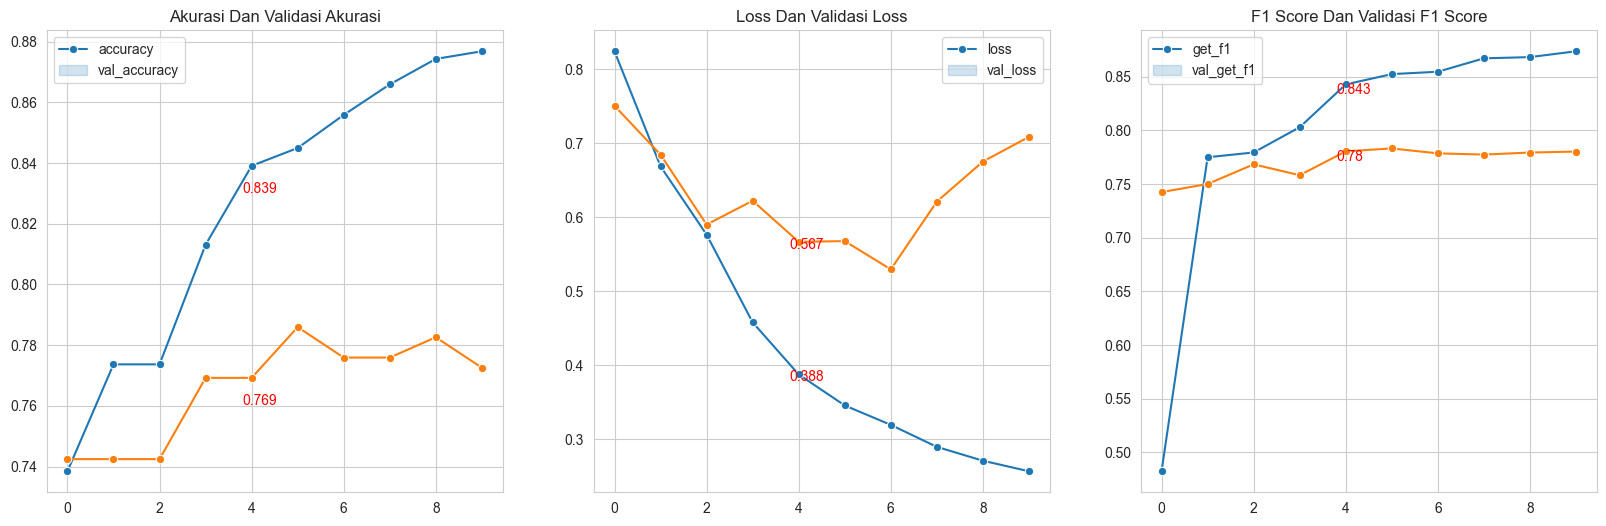

In [76]:
sns.set_style(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(20,6))
graph = ['accuracy', 'loss', 'get_f1']
title = ["Akurasi Dan Validasi Akurasi", "Loss Dan Validasi Loss", "F1 Score Dan Validasi F1 Score"]

def draw_graph(i, text, title):
    axes[i].set_title(title)
    fig = sns.lineplot(ax=axes[i], x=model_history.epoch, y=model_history.history[text], marker='o')
    fig = sns.lineplot(ax=axes[i], x=model_history.epoch, y=model_history.history[f'val_{text}'], marker='o')
    axes[i].legend([text, f'val_{text}'])

def text_graph(i, text):
    for j, (x, y) in enumerate(zip(model_history.epoch, model_history.history[f'{text}'])):
        if j == 4:
          axes[i].text(x = x - 0.2, y = y - 0.009, s = round(y, 3), color = 'red') 
    
    for j, (x, y) in enumerate(zip(model_history.epoch, model_history.history[f'val_{text}'])):
        if j == 4:
          axes[i].text(x = x - 0.2, y = y - 0.009, s = round(y, 3), color = 'red') 

for i, (val, tit) in enumerate(zip(graph, title)):
    draw_graph(i, val, tit)
    text_graph(i, val)


In [77]:
validation_test['STEMMING'] 
validation_test['polarity'].value_counts()

polarity
-1    181
 1     12
 0      8
Name: count, dtype: int64

In [78]:
# Lakukan one-hot encoding pada kolom 'polarity'
y = pd.get_dummies(validation_test['polarity']).values

# Ambil data untuk X (stemming)
X = np.array(validation_test['STEMMING'].tolist())

# Tampilkan hasil
print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (201,)
Shape y: (201, 3)


In [79]:
model_eval =  model.evaluate(X, y, batch_size=60)

4/4 [==============================] - 1s 12ms/step - loss: 0.6696 - TruePositive: 121.0000 - FalsePositive: 10.0000 - TrueNegative: 392.0000 - FalseNegative: 80.0000 - accuracy: 0.7015 - precision: 0.9237 - recall: 0.6020 - auc: 0.9004 - get_f1: 0.6785


In [80]:
model_eval

[0.6696123480796814,
 121.0,
 10.0,
 392.0,
 80.0,
 0.7014925479888916,
 0.9236640930175781,
 0.6019900441169739,
 0.9004294872283936,
 0.6785448789596558]

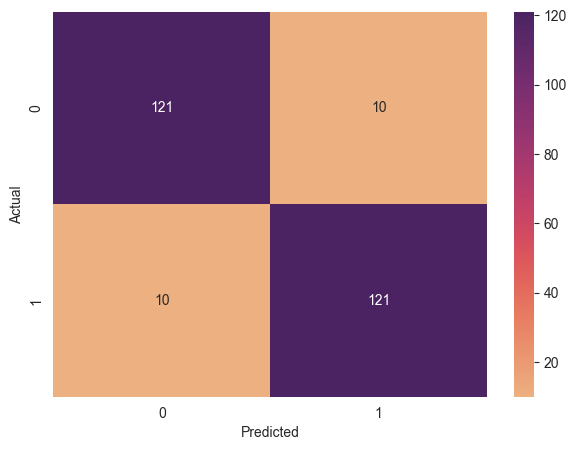

In [81]:
plt.figure(figsize=(7, 5))
sns.heatmap((
    [int(model_eval[1]), int(model_eval[2])],  
    [int(model_eval[2]), int(model_eval[1])]
), annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [82]:
def predictText(text):
    return className[np.argmax(model.predict([text]))]

In [83]:
model.save('D:\AYO KULIAH\MAGANG KOMINFO\METODE CNN DAN LSTM\LSTM DAN CNN FIX\FIX LAPORAN AKHIR\kemiskinan jatim')

INFO:tensorflow:Assets written to: D:\AYO KULIAH\MAGANG KOMINFO\METODE CNN DAN LSTM\LSTM DAN CNN FIX\FIX LAPORAN AKHIR\kemiskinan jatim\assets


INFO:tensorflow:Assets written to: D:\AYO KULIAH\MAGANG KOMINFO\METODE CNN DAN LSTM\LSTM DAN CNN FIX\FIX LAPORAN AKHIR\kemiskinan jatim\assets


In [85]:
import pandas as pd

# Gunakan garis miring maju (/) untuk path
df_predict_kemiskinan = pd.read_csv('D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\Kode fix topik kemiskinan jatim\\HASILnew.csv')



In [86]:
df_predict = [df_predict_kemiskinan]
name = ['kemiskinan']

In [88]:
for k, dataframe in enumerate(df_predict):
    temp = model.predict(dataframe['STEMMING'])
    list = []
    for i in range(len(temp)):
        predicted_class_index = np.argmax(temp[i])
        predicted_class = className.get(predicted_class_index)
        if predicted_class is not None:
            list.append(predicted_class)
        else:
            list.append('Unknown Class')
    dataframe['predict'] = list
    dataframe.to_csv('D:\\AYO KULIAH\\MAGANG KOMINFO\\METODE CNN DAN LSTM\\LSTM DAN CNN FIX\\FIX LAPORAN AKHIR\\newpredict.csv'.format(name[k]), index=False)


7/7 [==============================] - 0s 5ms/step
